# Neural Networks Project for Deep Learning

*Filip Jovanović*



## Project Requirements

- Main objective of the analysis that also specifies whether your model will be focused on a specific type of Deep Learning or Reinforcement Learning algorithm and the benefits that your analysis brings to the business or stakeholders of this data.

- Brief description of the data set you chose, a summary of its attributes, and an outline of what you are trying to accomplish with this analysis.

- Brief summary of data exploration and actions taken for data cleaning or feature engineering.

- Summary of training at least three variations of the Deep Learning model you selected. For example, you can use different clustering techniques or different hyperparameters.

- A paragraph explaining which of your Deep Learning models you recommend as a final model that best fits your needs in terms of accuracy or explainability.

- Summary Key Findings and Insights, which walks your reader through the main findings of your modeling exercise.

- Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model or adding specific data features to achieve a better model.

## About the data

- Data set taken from [Kaggle](https://www.kaggle.com/datasets/jocelyndumlao/global-markup-estimates-primary-foods-industry).

### Description
Data set contains information on real estate prices and house parameters like how old is the house for example or the size of the houses.

### Categories
- transaction date
- house age (how many years was this house present)
- distance to the nearest MRT station
- number of convenience stores
- latitude (house metrics)
- longitude (house metrics)
- house price of unit area (TARGET)


## Main objectives 

The main objective of this project is to build and train 3 different neural networks to predict the `house price of unit area` column in the dataset. 

3 different models will be:
- Sequential neural network (simple)
- Functional neural network (complex)
- RNN -> LSTM and GRU (high complexity)

This project will focus on supervised deep learning for regression problem.

## Exploratory data analysis 

In this section we will preform data cleaning and feature engineering to prepare our data for our models in the future, so let us first take a look at our raw data as it is.

Before we look at our data we need to import some needed libraries:

In [151]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow as tf
print(tf. __version__)

from tensorflow import keras
from tensorflow.keras import layers, Model
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding,Masking,LSTM, GRU, Dropout, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from keras.metrics import CosineSimilarity
from keras import initializers

sns.set_context('notebook')
sns.set_style('white')
np.random.seed(2024)

2.11.0


In [152]:
data = pd.read_csv('data/Real estate.csv')
data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [153]:
print(f"In this dataset there is {data.isnull().value_counts().drop(False).sum()} missing entries.")

In this dataset there is 0 missing entries.


In [154]:
df = data.copy()
df.drop(columns=['No'], inplace=True, axis= 1)
df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


With 0 missing values and column `No` dropped (gives us no additional information, represents only ordinal number of entry) we can plot some graphs to see the corelation and distribution of our data.

Feature engineering was short and simple because this dataset is already made for model exercise and already preprocessed for future use.

Given the stated above it is not needed to go any further into the data analysis but rather focus on model building and training. 

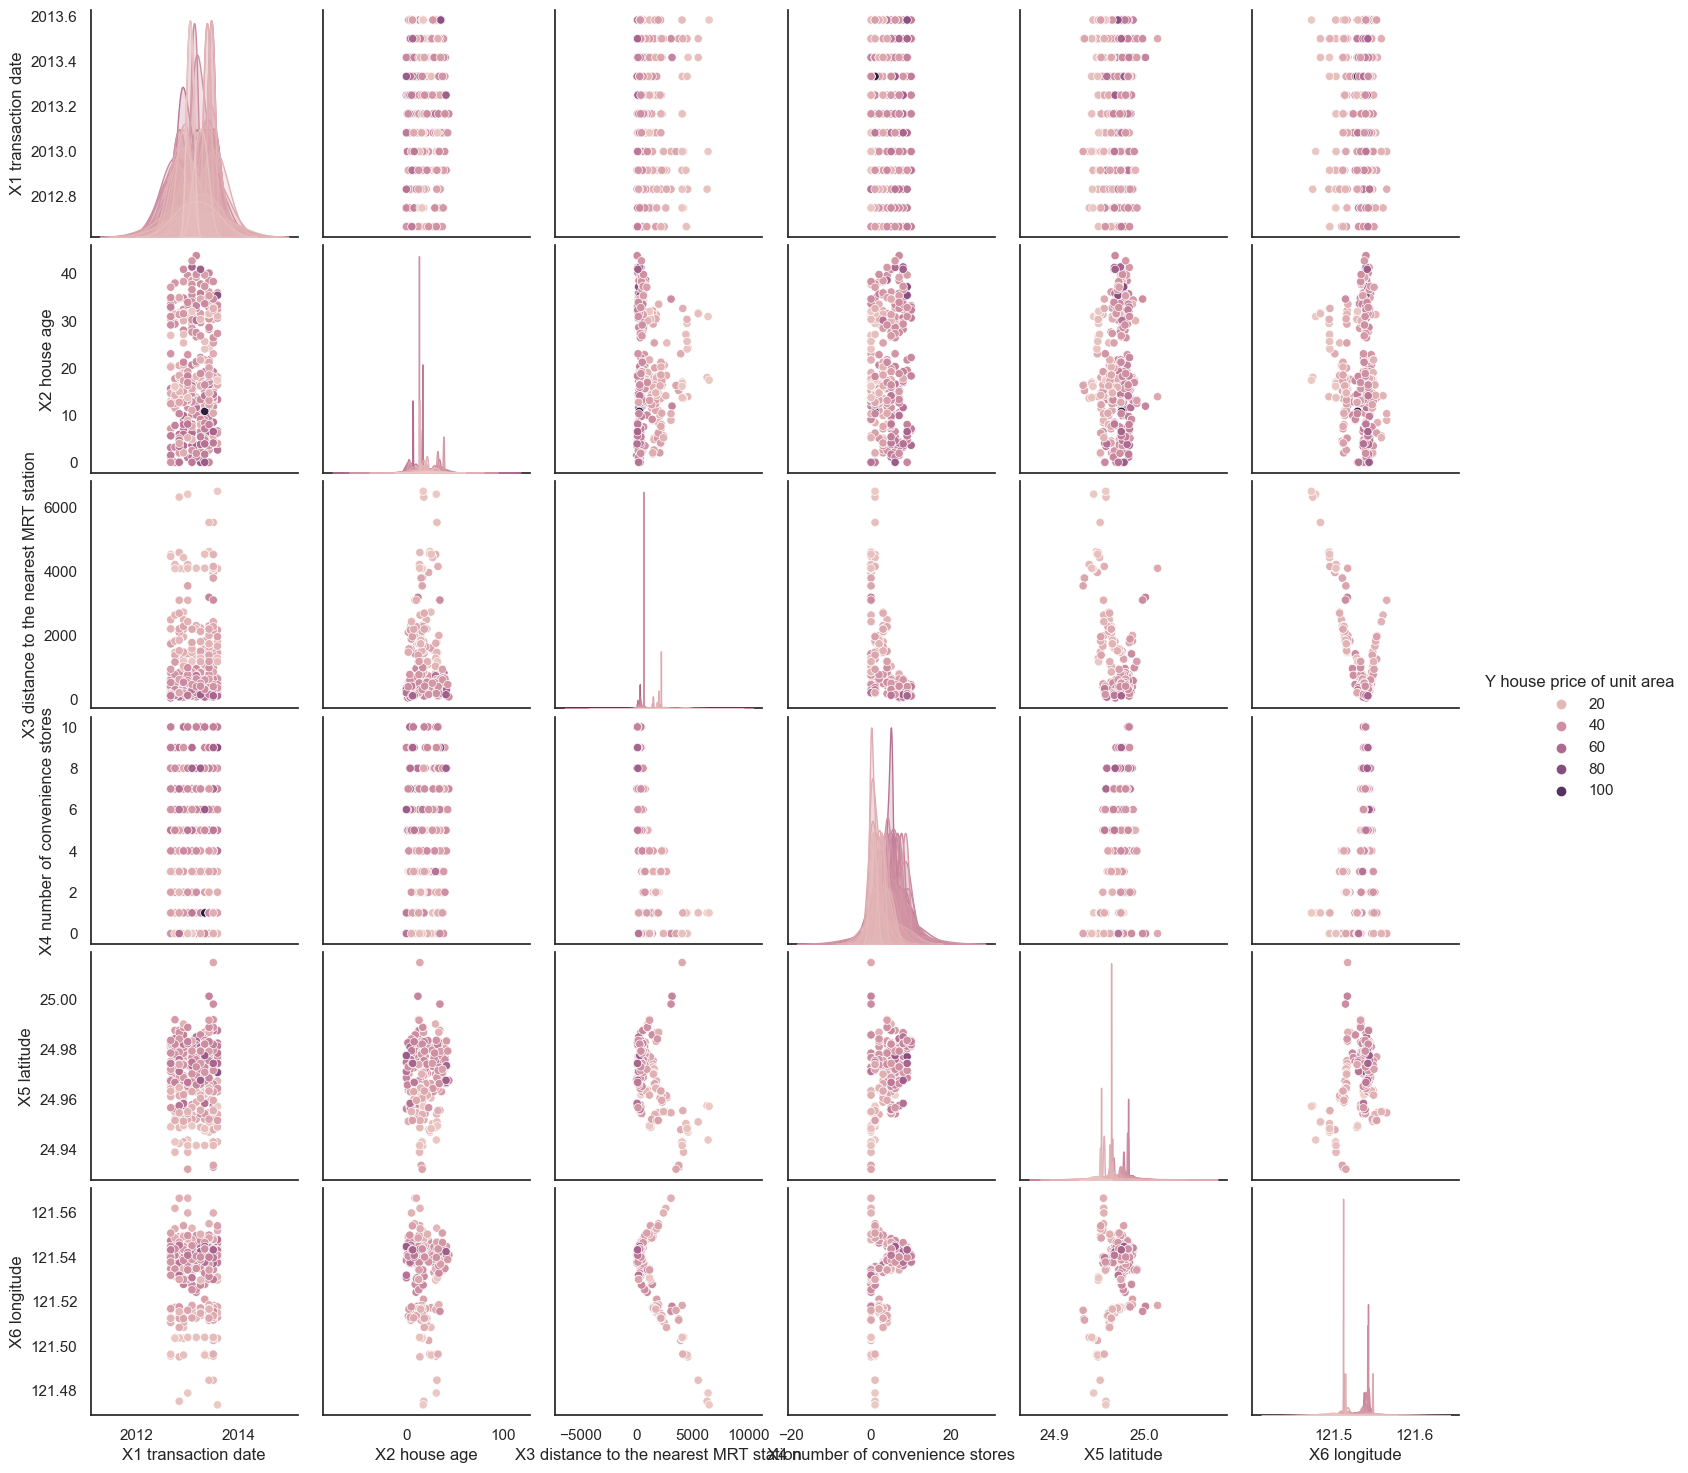

In [155]:
sns.pairplot(df, hue='Y house price of unit area')

Now we plot the heatmap to visually get a better idea of our correlation factors of our data.

<AxesSubplot:>

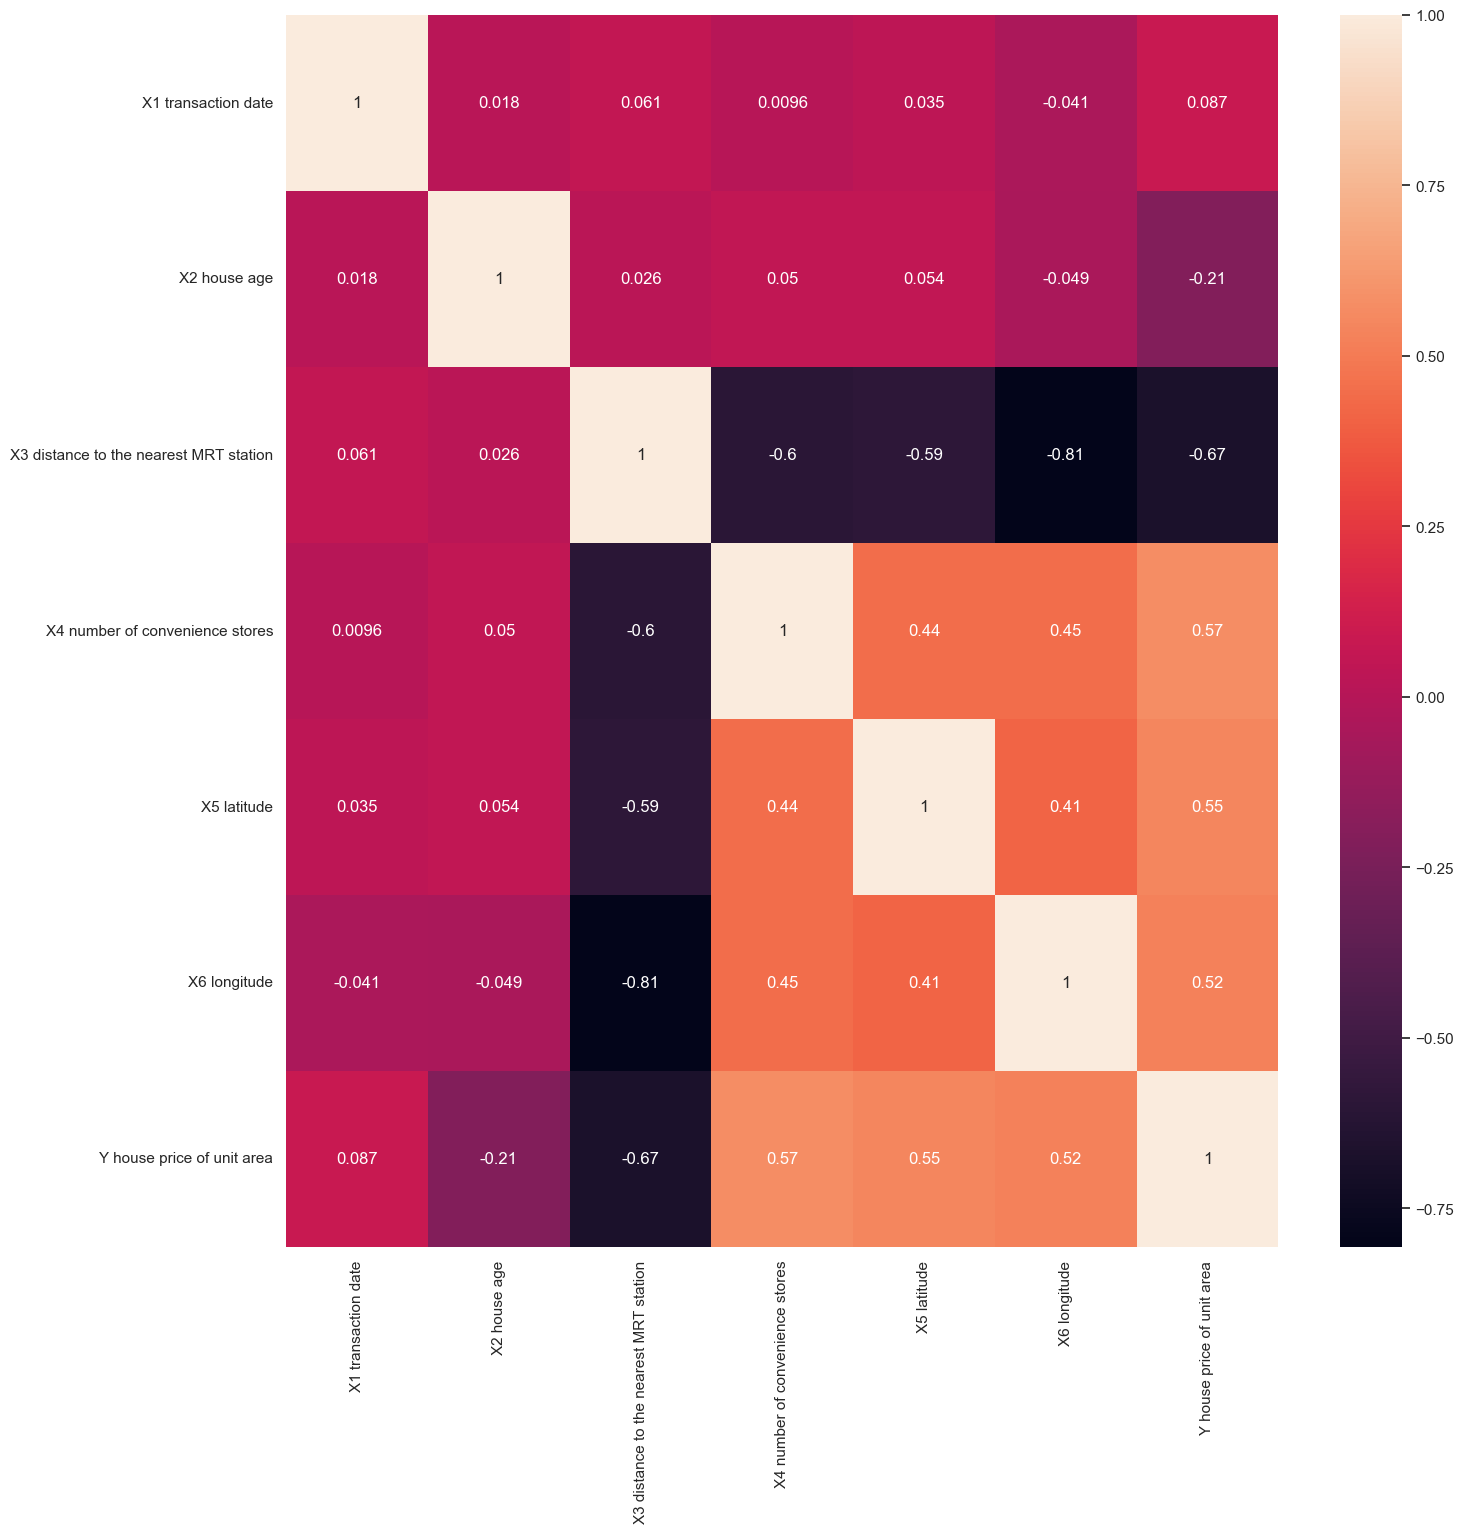

In [156]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:>

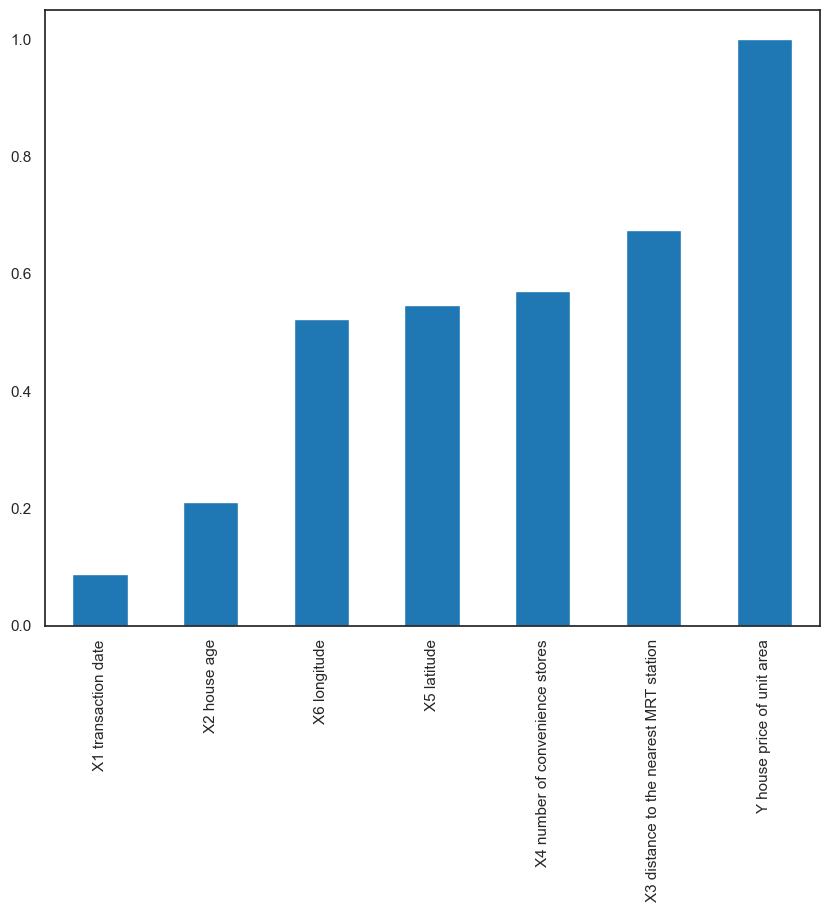

In [157]:
corelations = abs(df.corr()["Y house price of unit area"]).sort_values()
corelations.plot(kind='bar', figsize=(10,8))

Summary of data exploration graphs:

1. pair plot shows the distribution of our data 
2. heatmap shows correlation factors between all columns
3. bar plot shows absolute values of correlation factors between feature columns and target column

## Neural network models

### Defining the models

Before we define and use our models we will use StandardScaler to transform our dataset. The reason for this is that our neural network models work better and faster with scaled data.  

In [158]:
df_SS = StandardScaler().fit_transform(df)
df_SS = pd.DataFrame(df_SS)
df_SS

,0,1,2,3,4,5,6
0,-0.823683,1.255628,-0.792495,2.007407,1.125430,0.448762,-0.005901
1,-0.823683,0.157086,-0.616612,1.667503,0.912444,0.401139,0.310507
2,1.541151,-0.387791,-0.414015,0.307885,1.486860,0.688183,0.685782
3,1.246435,-0.387791,-0.414015,0.307885,1.486860,0.688183,1.237656
4,-1.121951,-1.117223,-0.549997,0.307885,0.834188,0.592937,0.376732
...,...,...,...,...,...,...,...
409,-0.528967,-0.352637,2.378365,-1.391638,-2.216993,-1.927835,-1.661525
410,-1.711384,-1.064493,-0.788071,1.667503,0.427579,0.635341,0.884457
411,0.358734,0.095568,-0.549678,0.987694,0.822893,0.423972,0.192774
412,-0.528967,-0.844784,-0.776684,0.307885,-0.184755,0.476814,1.068415


We will perform a test and train split on our data, so we can have our training and validation data ready. Validation portion of our data  will be 20% of our original dataset. 

In [159]:
Y = df_SS[6]
X = df_SS.drop(columns=6, axis=1) 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Model 1: Sequential model with only Dense layers

In the cell below we define function `sequential` that returns our Sequential model consisting of only Dense layers. Function compiles the model taking into account mean absolute error as loss function and cosine similarity as metrics to display. We use `Adam(learning_rate=0.001)` optimiser during compiling. This function also displays model summary so that we can better understand the structure of our model.    

In [160]:
def sequential(x) -> object:
    activation = 'relu'
    model = Sequential()
    model.add(Dense(128, input_dim=x.shape[1], activation=activation, kernel_initializer='normal'))

    # The Hidden Layers :
    model.add(Dense(256, kernel_initializer='normal',activation=activation, kernel_regularizer='l1_l2'))
    model.add(Dense(256, kernel_initializer='normal',activation=activation, kernel_regularizer='l1_l2'))
    model.add(Dense(256, kernel_initializer='normal',activation=activation, kernel_regularizer='l1_l2'))
    model.add(Dense(256, kernel_initializer='normal',activation=activation, kernel_regularizer='l1_l2'))
    model.add(Dense(256, kernel_initializer='normal',activation=activation, kernel_regularizer='l1_l2'))
    model.add(Dense(256, kernel_initializer='normal',activation=activation, kernel_regularizer='l1_l2'))
    model.add(Dense(128, kernel_initializer='normal',activation=activation, kernel_regularizer='l1_l2'))
    model.add(Dense(64, kernel_initializer='normal',activation=activation, kernel_regularizer='l1_l2'))
    
    # The Output Layer :
    model.add(Dense(1, kernel_initializer='normal',activation='linear'))
    
    # Compile the network :
    model.compile(loss='mean_absolute_error', optimizer=Adam(learning_rate=0.001), metrics=CosineSimilarity())
    model.summary()
    return model

In [161]:
model_sequential = sequential(x_train)


Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_71 (Dense)            (None, 128)               896       
                                                                 
 dense_72 (Dense)            (None, 256)               33024     
                                                                 
 dense_73 (Dense)            (None, 256)               65792     
                                                                 
 dense_74 (Dense)            (None, 256)               65792     
                                                                 
 dense_75 (Dense)            (None, 256)               65792     
                                                                 
 dense_76 (Dense)            (None, 256)               65792     
                                                                 
 dense_77 (Dense)            (None, 256)             

We call the function and get the model summary above. After that we are ready to fit our model with batch size of 5 and 100 epochs. 

In [162]:
history_sequential = model_sequential.fit(x_train,
                     y_train,
                     batch_size = 5,
                     epochs = 100,
                     verbose = 1,
                     validation_data=(x_test, y_test))


Epoch 1/100
67/67 [==============================] - 2s 7ms/step - loss: 78.0450 - cosine_similarity: 0.0151 - val_loss: 20.8632 - val_cosine_similarity: -0.1566
Epoch 2/100
67/67 [==============================] - 0s 3ms/step - loss: 7.8503 - cosine_similarity: 0.0816 - val_loss: 2.1277 - val_cosine_similarity: -0.1566
Epoch 3/100
67/67 [==============================] - 0s 4ms/step - loss: 1.5102 - cosine_similarity: 0.0816 - val_loss: 1.3207 - val_cosine_similarity: -0.1566
Epoch 4/100
67/67 [==============================] - 0s 3ms/step - loss: 1.2967 - cosine_similarity: 0.0816 - val_loss: 1.3162 - val_cosine_similarity: -0.1566
Epoch 5/100
67/67 [==============================] - 0s 4ms/step - loss: 1.2924 - cosine_similarity: 0.0816 - val_loss: 1.3156 - val_cosine_similarity: -0.1566
Epoch 6/100
67/67 [==============================] - 0s 3ms/step - loss: 1.2893 - cosine_similarity: 0.0816 - val_loss: 1.3177 - val_cosine_similarity: -0.1566
Epoch 7/100
67/67 [===================

In [163]:
score, acc = model_sequential.evaluate(x_test, y_test,
                                       batch_size=50)
print('Mean absolute error:', score)
print('Cosine Similarity:', acc)

2/2 [==============================] - 0s 4ms/step - loss: 1.3279 - cosine_similarity: -0.1566
Mean absolute error: 1.327857255935669
Cosine Similarity: -0.15662650763988495


After fitting our first model we see that mean absolute error is low around 1.3 and our cosine similarity is a negative number around -0.15, but even if it is negative it matters not because cosine similarity values range from 0 to 1, so negative value can be presented as its positive counterpart meaning our Sequential model cosine similarity is 0.15. 

In general our error and similarity values are not that good so we will try and bring that error down and similarity up in our ongoing models.

### Model 2: Functional model with different layers

In the cell below we define our Functional model. function below compiles the model and returns it as well as printing out model summary. This model consist of Dense layers (which is not an improvement from before), BatchNormalization layers (between hidden layers) which serve for normalisation Dense layers outputs and Dropout layers which are used for bias regularization. Compile metrics are same here as they were in our Sequential model: `model.compile(loss='mean_absolute_error', optimizer=Adam(learning_rate=0.001), metrics=CosineSimilarity())`  

In [164]:
def functional(x) -> object:
    inp = Input(shape = x.shape[1])
    
    Dense_layer_0 = Dense(256, kernel_initializer='normal',activation='relu',kernel_regularizer='l1_l2')(inp)
    BNormas_layer_0 = BatchNormalization(  axis=-1,
                                         momentum=0.99,
                                         epsilon=0.001,
                                         beta_initializer="zeros",
                                         gamma_initializer="ones",
                                         moving_mean_initializer="zeros",
                                         moving_variance_initializer="ones")(Dense_layer_0)
    Dropout_layer_0 = Dropout(0.1)(BNormas_layer_0)
    
    Dense_layer_1 = Dense(256, kernel_initializer='normal',activation='relu',kernel_regularizer='l1_l2')(Dropout_layer_0)
    BNormas_layer_1 = BatchNormalization(  axis=-1,
                                           momentum=0.99,
                                           epsilon=0.001,
                                           beta_initializer="zeros",
                                           gamma_initializer="ones",
                                           moving_mean_initializer="zeros",
                                           moving_variance_initializer="ones")(Dense_layer_1)
    Dropout_layer_1 = Dropout(0.1)(BNormas_layer_1)
    
    Dense_layer_2 = Dense(256, kernel_initializer='normal',activation='relu',kernel_regularizer='l1_l2')(Dropout_layer_1)
    BNormas_layer_2 = BatchNormalization(  axis=-1,
                                           momentum=0.99,
                                           epsilon=0.001,
                                           beta_initializer="zeros",
                                           gamma_initializer="ones",
                                           moving_mean_initializer="zeros",
                                         moving_variance_initializer="ones")(Dense_layer_2)
    Dropout_layer_2 = Dropout(0.1)(BNormas_layer_2)
    
    Dense_layer_3 = Dense(256, kernel_initializer='normal',activation='relu',kernel_regularizer='l1_l2')(Dropout_layer_2)
    BNormas_layer_3 = BatchNormalization(  axis=-1,
                                           momentum=0.99,
                                           epsilon=0.001,
                                           beta_initializer="zeros",
                                           gamma_initializer="ones",
                                           moving_mean_initializer="zeros",
                                           moving_variance_initializer="ones")(Dense_layer_3)
    Dropout_layer_3 = Dropout(0.1)(BNormas_layer_3)
    
    Dense_layer_4 = Dense(256, kernel_initializer='normal',activation='relu',kernel_regularizer='l1_l2')(Dropout_layer_3)
    BNormas_layer_4 = BatchNormalization(  axis=-1,
                                           momentum=0.99,
                                           epsilon=0.001,
                                           beta_initializer="zeros",
                                           gamma_initializer="ones",
                                           moving_mean_initializer="zeros",
                                           moving_variance_initializer="ones")(Dense_layer_4)
    Dropout_layer_4 = Dropout(0.1)(BNormas_layer_4)

    Dense_layer_5 = Dense(1, kernel_initializer='normal',activation='linear')(BNormas_layer_4)

    
    model = Model(inputs = inp, outputs = Dense_layer_5)
    model.compile(loss='mean_absolute_error', optimizer=Adam(learning_rate=0.001), metrics=CosineSimilarity())
    model.summary()
    
    return model

In [165]:
model_functional = functional(x_train)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense_81 (Dense)            (None, 256)               1792      
                                                                 
 batch_normalization_10 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dense_82 (Dense)            (None, 256)               65792     
                                                                 
 batch_normalization_11 (Bat  (None, 256)              1024      
 chNormalization)                                          

In comparison to the last model we can see that in this one we have some Non-trainable parameters because of our Dropout layers. 

In [166]:
history_functional = model_functional.fit(x_train,
                     y_train,
                     batch_size = 5,
                     epochs = 100,
                     verbose = 1,
                     validation_data=(x_test, y_test))

Epoch 1/100
67/67 [==============================] - 3s 7ms/step - loss: 93.9675 - cosine_similarity: 0.3595 - val_loss: 78.5091 - val_cosine_similarity: 0.1566
Epoch 2/100
67/67 [==============================] - 0s 4ms/step - loss: 66.4259 - cosine_similarity: 0.3897 - val_loss: 55.1132 - val_cosine_similarity: 0.1566
Epoch 3/100
67/67 [==============================] - 0s 3ms/step - loss: 46.0747 - cosine_similarity: 0.4381 - val_loss: 37.7381 - val_cosine_similarity: 0.1566
Epoch 4/100
67/67 [==============================] - 0s 3ms/step - loss: 30.9142 - cosine_similarity: 0.4260 - val_loss: 25.3059 - val_cosine_similarity: 0.1566
Epoch 5/100
67/67 [==============================] - 0s 3ms/step - loss: 20.7270 - cosine_similarity: 0.4502 - val_loss: 16.8574 - val_cosine_similarity: -0.1566
Epoch 6/100
67/67 [==============================] - 0s 3ms/step - loss: 14.0132 - cosine_similarity: 0.3535 - val_loss: 11.5307 - val_cosine_similarity: 0.0602
Epoch 7/100
67/67 [==============

In [167]:
score, acc = model_functional.evaluate(x_test, y_test,
                                       batch_size=50)
print('Mean absolute error:', score)
print('Cosine Similarity:', acc)

2/2 [==============================] - 0s 3ms/step - loss: 0.8004 - cosine_similarity: 0.6627
Mean absolute error: 0.8003787994384766
Cosine Similarity: 0.6626505851745605


After fitting the model with same number of epochs and batch size as before, we see that we succeeded in lowering the error and bringing up the similarity value. Our new values are error: 0.8 , similarity: 0.66.
Meaning the more complex our network is the better. Or is it? 

Next two models will be structurally simpler than previous two but will preform the same or even better and faster.

### Model 3: LSTM

In the cell below we de fine our LSTM model (Sequential model with LSTM layer and couple Dense layers). This function works all the same as the previous two (model definition, model compiling and summary).

In [168]:
def simple_rnn_LSTM(x) -> object:
    num_features = x_train.shape[1]
    model_rnn = Sequential()
    
    model_rnn.add(LSTM( units=256,
                        input_shape=(num_features, 1),
                        kernel_initializer=initializers.RandomNormal(stddev=0.001),
                        recurrent_initializer=initializers.Identity(gain=1.0),
                        activation='relu',
                        ))
    
    model_rnn.add(Dense(256, activation='relu'))
    model_rnn.add(Dense(128, activation='relu'))
    model_rnn.add(Dense(1, activation='linear'))
    
    rmsprop = keras.optimizers.RMSprop(learning_rate=.0001)

    model_rnn.compile(loss='mean_absolute_error',
                      optimizer=rmsprop,
                      metrics=CosineSimilarity())
    
    model_rnn.summary()
   
    return model_rnn

In [169]:
model_simple_rnn = simple_rnn_LSTM(x_train)

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 256)               264192    
                                                                 
 dense_87 (Dense)            (None, 256)               65792     
                                                                 
 dense_88 (Dense)            (None, 128)               32896     
                                                                 
 dense_89 (Dense)            (None, 1)                 129       
                                                                 
Total params: 363,009
Trainable params: 363,009
Non-trainable params: 0
_________________________________________________________________


Given the output above we see that we have more trainable parameters than the last model.

In [170]:
x_train_arr = np.array(x_train)
x_test_arr = np.array(x_test)

In [171]:
x_train_shaped = x_train_arr.reshape((331, 6, 1))
x_test_shaped = x_test_arr.reshape((83, 6, 1))


Before we fit this and the next model we will need to reshape our training and testing feature data. The reason for this is that RNN layers accept data shaped in the way shown in the two cells above.
Now that we have the data ready we can fit the model with it. We fit the model with same number of epochs and batch size as before.

In [172]:

history_rnn = model_simple_rnn.fit(x_train_shaped,
                     y_train,
                     batch_size = 5,
                     epochs = 100,
                     verbose = 1,
                     validation_data=(x_test_shaped, y_test))

Epoch 1/100
67/67 [==============================] - 2s 10ms/step - loss: 0.7811 - cosine_similarity: 0.3414 - val_loss: 0.7920 - val_cosine_similarity: 0.2289
Epoch 2/100
67/67 [==============================] - 0s 7ms/step - loss: 0.7714 - cosine_similarity: 0.4562 - val_loss: 0.7781 - val_cosine_similarity: 0.5181
Epoch 3/100
67/67 [==============================] - 1s 9ms/step - loss: 0.7555 - cosine_similarity: 0.4804 - val_loss: 0.7572 - val_cosine_similarity: 0.4699
Epoch 4/100
67/67 [==============================] - 1s 8ms/step - loss: 0.7246 - cosine_similarity: 0.4864 - val_loss: 0.7216 - val_cosine_similarity: 0.4458
Epoch 5/100
67/67 [==============================] - 0s 7ms/step - loss: 0.6809 - cosine_similarity: 0.5045 - val_loss: 0.6543 - val_cosine_similarity: 0.4940
Epoch 6/100
67/67 [==============================] - 0s 7ms/step - loss: 0.6322 - cosine_similarity: 0.5227 - val_loss: 0.5949 - val_cosine_similarity: 0.5181
Epoch 7/100
67/67 [==========================

In [173]:
score, acc = model_simple_rnn.evaluate(x_test, y_test,
                                       batch_size=50)
print('Mean absolute error:', score)
print('Cosine Similarity:', acc)

2/2 [==============================] - 0s 7ms/step - loss: 0.3724 - cosine_similarity: 0.6145
Mean absolute error: 0.372376948595047
Cosine Similarity: 0.6144577860832214


We see that we managed to bring our error down by 0.42 which is good but our similarity went down but just by 0.05 which is a good tradeoff.

Last question that is presented: can we make it faster?
The next Model will do just that. 

### Model 4: GRU

In the cell below we de fine our GRU model (Sequential model with GRU layer and couple Dense layers). This function works all the same as before (model definition, model compiling and summary).

In [174]:
def simple_rnn_GRU(x) -> object:
    num_features = x_train.shape[1]
    model_rnn = Sequential()

    model_rnn.add(GRU( units=256,
                        input_shape=(num_features, 1),
                        kernel_initializer=initializers.RandomNormal(stddev=0.001),
                        recurrent_initializer=initializers.Identity(gain=1.0),
                        activation='relu',
                        ))

    model_rnn.add(Dense(256, activation='relu'))
    model_rnn.add(Dense(128, activation='relu'))
    model_rnn.add(Dense(1, activation='linear'))

    rmsprop = keras.optimizers.RMSprop(learning_rate=.0001)

    model_rnn.compile(loss='mean_absolute_error',
                      optimizer=rmsprop,
                      metrics=CosineSimilarity())

    model_rnn.summary()

    return model_rnn

In [175]:
model_simple_rnn_2 = simple_rnn_GRU(x_train)

history_rnn_2 = model_simple_rnn_2.fit(x_train_shaped,
                     y_train,
                     batch_size=5,
                     epochs=100,
                     verbose=1,
                     validation_data=(x_test_shaped, y_test))



Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 256)               198912    
                                                                 
 dense_90 (Dense)            (None, 256)               65792     
                                                                 
 dense_91 (Dense)            (None, 128)               32896     
                                                                 
 dense_92 (Dense)            (None, 1)                 129       
                                                                 
Total params: 297,729
Trainable params: 297,729
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
67/67 [==============================] - 2s 8ms/step - loss: 0.7788 - cosine_similarity: 0.4320 - val_loss: 0.7896 - val_cosine_similarity: 0.2048
Epoch 2/100
67/67 [=

In [176]:
score, acc = model_simple_rnn_2.evaluate(x_test, y_test,
                                         batch_size=50)
print('Mean absolute error:', score)
print('Cosine Similarity:', acc)

2/2 [==============================] - 0s 4ms/step - loss: 0.3734 - cosine_similarity: 0.6145
Mean absolute error: 0.37341436743736267
Cosine Similarity: 0.6144578456878662


We see that our error and similarity almost did not change, but the execution time was lower. If you look at the execution time of our LSTM model it would go even to 1s and 6ms and execution time of our GRU model is 6ms max, cutting the execution time by a second an epoch which is not much but with more complex models it could be. 

## Models summary

1. Sequential model:
- Fast
- Simple implementation
- High error rate(compared to others)
- Easy to understand
- Low similarity of predicted data and original data 

2. Functional model:
- Slower than Sequential model
- More complex implementation compared to Sequential model
- Lower error rate 
- Harder to understand but still simple
- Higher similarity of predicted data and original data 

3. LSTM layered model:
- Slower than other tested models
- Simple implementation but one complex layer (LSTM)
- Low error rate(compared to others)
- Harder to understand
- High similarity of predicted data and original data (compared to Functional and Sequential model) 

4. GRU layered model:
- Faster than LSTM layer model
- Simple implementation but one complex layer (GRU)
- Low error rate (compared to others, almost the same as LSTM)
- Harder to understand
- High similarity of predicted data and original data (compared to Functional and Sequential model, almost the same as LSTM) 

## Model metrics: graphical representation

In this section graphs will be presented showing results (Mean absolute error and Cosine similarity) of all 4 trained models. 
This is done to better understand how our models behave trough epochs. Considering following graphs some future actions can be deducted from them, and they will be disused in 'Next steps' section of this project. 

We define function to help us plot our needed data for each model. 

In [180]:
def show_metrics(history, name: str):
    
    plt.plot(history.history['cosine_similarity'])
    plt.plot(history.history['val_cosine_similarity'])
    plt.title('Model Cosine Similarity for model: ' + name)
    plt.ylabel('Cosine Similarity')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    
    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss for model: ' + name)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

We call the function 4 times for all models in order: Sequential, Functional, LSTM and GRU. Function returns two plots for each model giving us 8 plots all together shown below in previously stated sequence. 

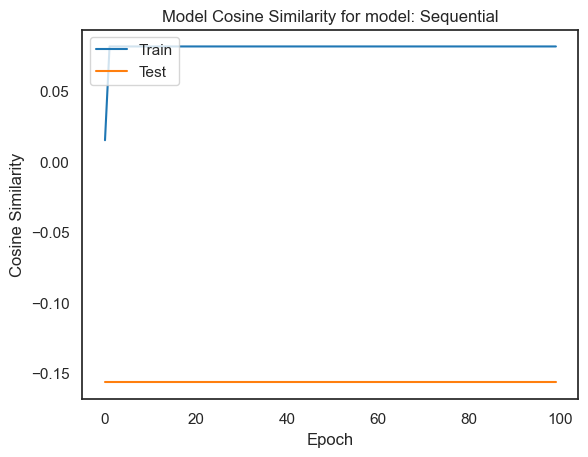

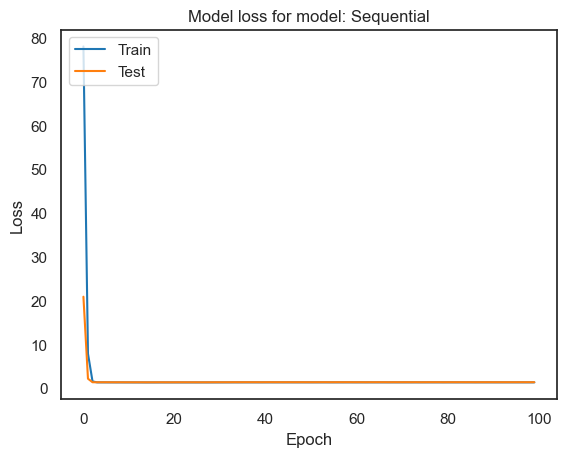

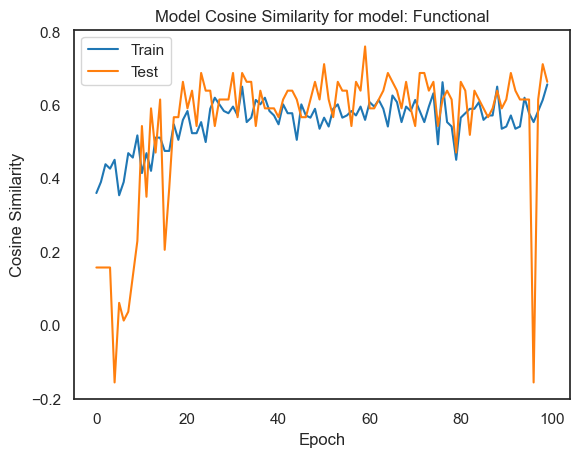

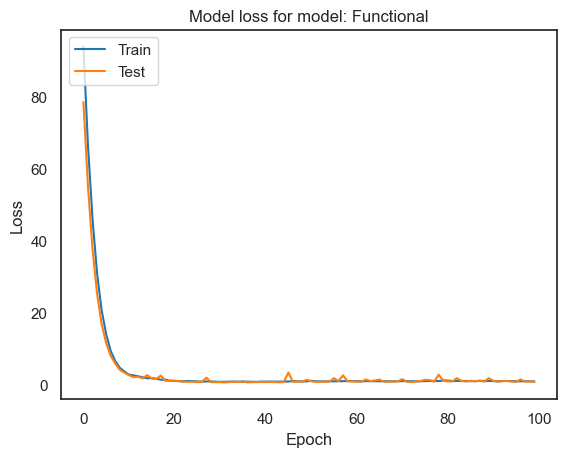

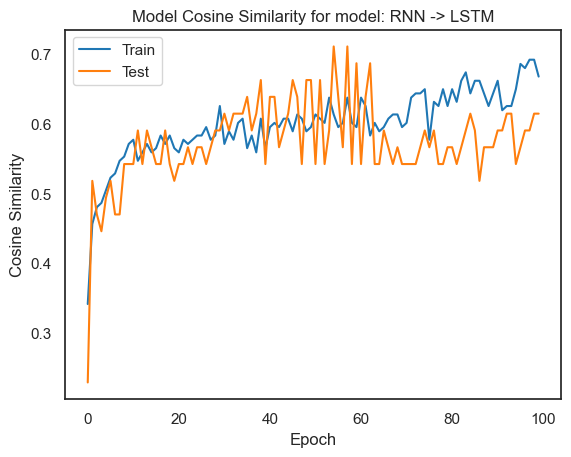

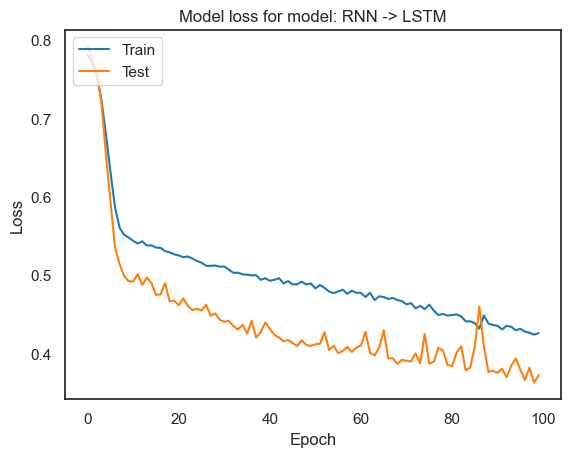

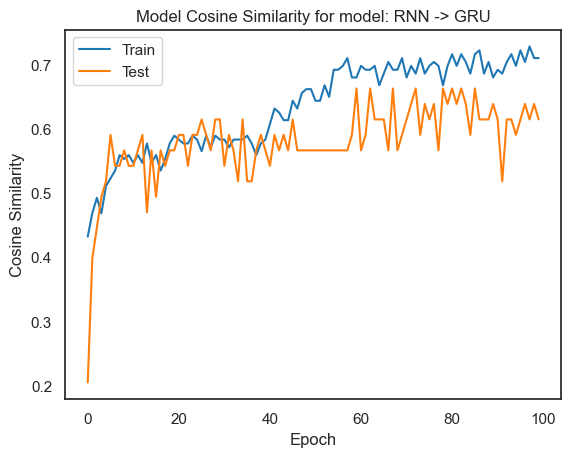

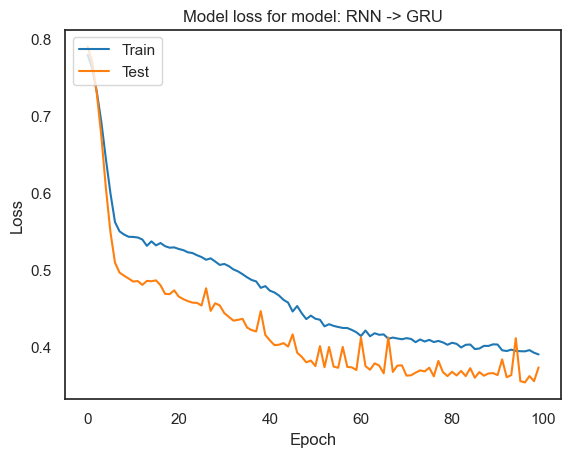

In [181]:
show_metrics(history_sequential,'Sequential')
show_metrics(history_functional,'Functional')
show_metrics(history_rnn,'RNN -> LSTM')
show_metrics(history_rnn_2,'RNN -> GRU')


# Key findings 

When looking at teh results of trained models several things can be said about chosen dataset and trained neural networks:
- Sequential and Functional model perform fine on our data given the fact they represent simpler neural network models
- GRU and LSTM preform better but with cosine similarity of around 0.66 there is more progres to be done with these models
- Best model for this data set (from 4 tested in this project) would be GRU layerd sequential model because it has a reasonable execution time and good enough score 
- This data set is well constructed and just with StandardScaler or MinMaxScaler it can be considered training ready 
- With low number of feature columns this dataset should not present any problems memory-vise, which means we can focus on building more complex models without needing to consider dimensionality reduction of our data (for now)
   

# Next steps

Next steps should include:
1. Training our models further as they are (more epochs, changing the batch size)
2. Tuning the parameters (keep in mind that our GRU and LSTM models use Rmsprop optimiser but Sequential and Functional model use Adam optimiser), we can change the activation functions, optimisers, input sizes, kernel initializers and other parameters
3. Adding layers / changing layers / reordering layers -> Building and rebuilding our initial models could lead to better results especially when talking about adding more layers to an existing model (with purpose, not just stacking mindlessly), but we need to take into account that adding layers lowers our execution time so being cautious about balancing model performance and speed should be one of top priorities
4. Manipulating the data -> loq or sqrt transformation should normalise the distribution of our data and dimensionality reduction should lead to even faster models while keeping most of explained variance
5. Building a new unexplored model
6. Using some pretrained models (transfer learning) for regression problems similar to this one 